### Ticker list

Technology

AAPL: Apple Inc.
MSFT: Microsoft Corporation
GOOGL: Alphabet Inc. (Google)
AMZN: Amazon.com Inc.
META: Meta Platforms Inc. (Facebook)
TSLA: Tesla Inc.
NVDA: NVIDIA Corporation
INTC: Intel Corporation
IBM: International Business Machines Corporation
ORCL: Oracle Corporation
Finance

JPM: JPMorgan Chase & Co.
BAC: Bank of America Corporation
WFC: Wells Fargo & Company
C: Citigroup Inc.
GS: Goldman Sachs Group Inc.
MS: Morgan Stanley
V: Visa Inc.
MA: Mastercard Incorporated
PYPL: PayPal Holdings Inc.
AXP: American Express Company
Healthcare

JNJ: Johnson & Johnson
PFE: Pfizer Inc.
MRK: Merck & Co. Inc.
ABT: Abbott Laboratories
UNH: UnitedHealth Group Incorporated
TMO: Thermo Fisher Scientific Inc.
AMGN: Amgen Inc.
GILD: Gilead Sciences Inc.
BMY: Bristol-Myers Squibb Company
CVS: CVS Health Corporation
Consumer Goods

PG: Procter & Gamble Company
KO: The Coca-Cola Company
PEP: PepsiCo Inc.
NKE: Nike Inc.
MCD: McDonald's Corporation
SBUX: Starbucks Corporation
WMT: Walmart Inc.
TGT: Target Corporation
COST: Costco Wholesale Corporation



Enter the ticker symbol of the company AAPL


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


944/944 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - loss: 0.0085
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


<ipython-input-4-92d3c1d87f17>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


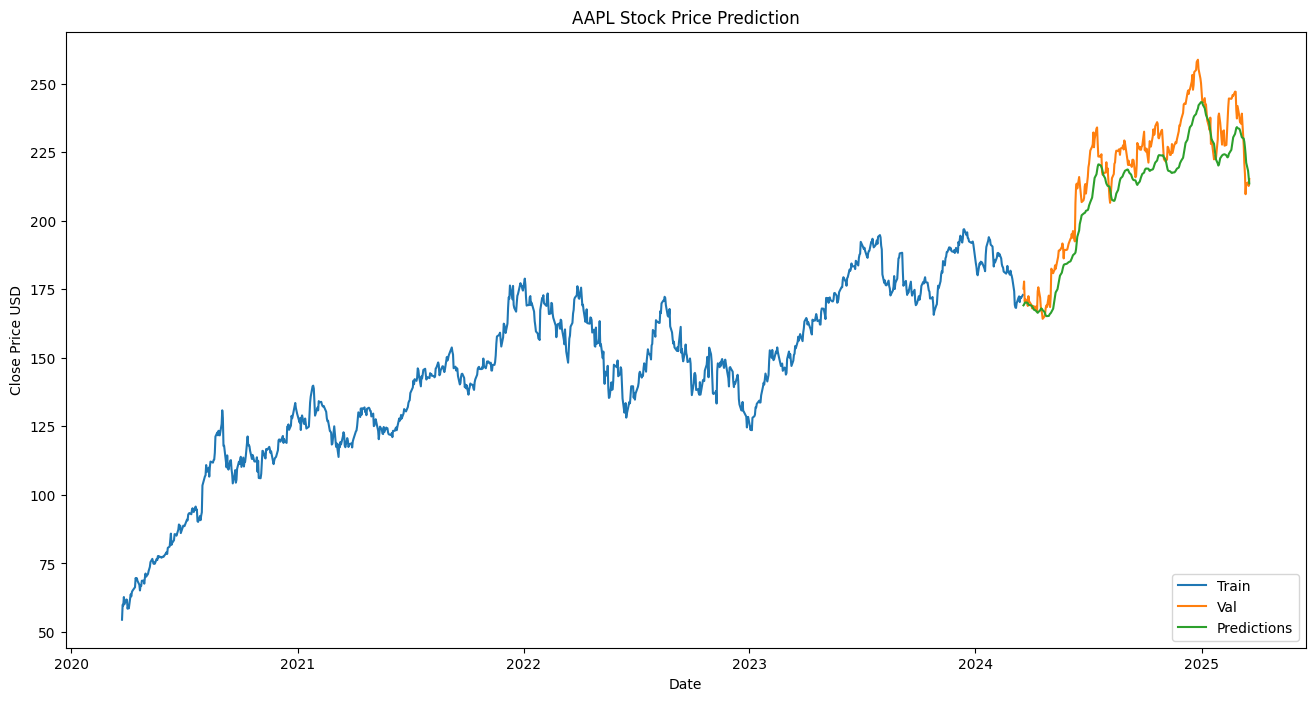

Latest Predicted Close Price for AAPL: $213.61


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import datetime

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def preprocess_data(stock_data):
    data = stock_data['Close'].values
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    training_data_len = int(np.ceil(len(scaled_data) * 0.8))
    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train, scaler, scaled_data, training_data_len

def build_lstm_model(x_train, y_train):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    return model

def predict_stock_price(model, scaler, scaled_data, training_data_len):
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    return predictions

def main():
    ticker = input("Enter the ticker symbol of the company ").strip().upper()
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=365 * 5)
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    if stock_data.empty:
        print(f"No data found for ticker: {ticker}")
        return
    x_train, y_train, scaler, scaled_data, training_data_len = preprocess_data(stock_data)
    model = build_lstm_model(x_train, y_train)
    if model is None:
        print("Model creation failed.")
        return
    predictions = predict_stock_price(model, scaler, scaled_data, training_data_len)
    train = stock_data[:training_data_len]
    valid = stock_data[training_data_len:]
    valid['Predictions'] = predictions
    plt.figure(figsize=(16, 8))
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    latest_prediction = predictions[-1][0]
    print(f"Latest Predicted Close Price for {ticker}: ${latest_prediction:.2f}")


if __name__ == "__main__":
    main()

Enter the ticker symbol of the company (e.g., AAPL): AAPL


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0462


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step


<ipython-input-5-5e21b3f33849>:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


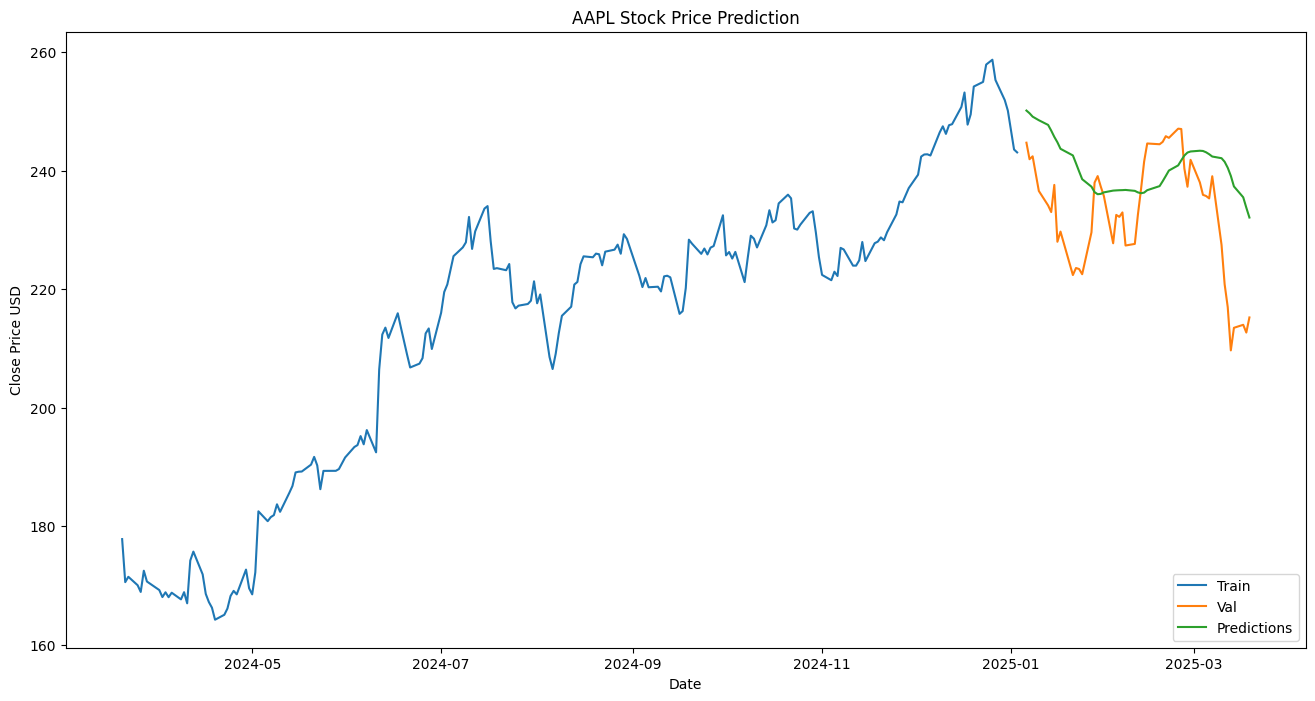

Latest Predicted Close Price for AAPL: $232.10


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import datetime

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data


def preprocess_data(stock_data):

    data = stock_data['Close'].values
    data = data.reshape(-1, 1)


    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)


    training_data_len = int(np.ceil(len(scaled_data) * 0.8))
    train_data = scaled_data[0:int(training_data_len), :]


    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train, scaler, scaled_data, training_data_len

def build_lstm_model(x_train, y_train):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    return model


def predict_stock_price(model, scaler, scaled_data, training_data_len):

    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    return predictions


def main():

    ticker = input("Enter the ticker symbol of the company (e.g., AAPL): ").strip().upper()
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=365)


    stock_data = fetch_stock_data(ticker, start_date, end_date)


    if stock_data.empty:
        print(f"No data found for ticker: {ticker}")
        return


    x_train, y_train, scaler, scaled_data, training_data_len = preprocess_data(stock_data)


    model = build_lstm_model(x_train, y_train)


    predictions = predict_stock_price(model, scaler, scaled_data, training_data_len)


    train = stock_data[:training_data_len]
    valid = stock_data[training_data_len:]
    valid['Predictions'] = predictions

    plt.figure(figsize=(16, 8))
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()


    latest_prediction = predictions[-1][0]
    print(f"Latest Predicted Close Price for {ticker}: ${latest_prediction:.2f}")



if __name__ == "__main__":
    main()

Enter the ticker symbol of the company (e.g., AAPL): AAPL


[*********************100%***********************]  1 of 1 completed


Training Loss (MSE): 8.373784528210116e-06


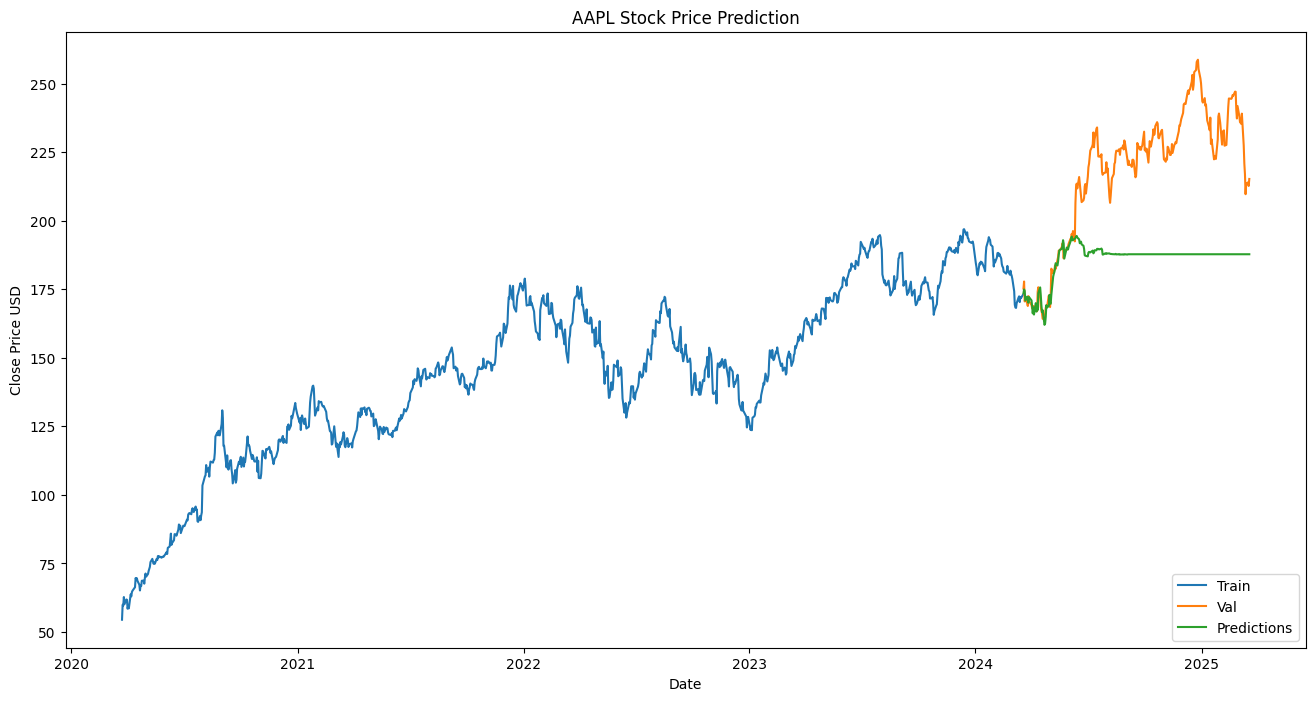

Latest Predicted Close Price for AAPL: $187.77


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import datetime

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def preprocess_data(stock_data):
    data = stock_data['Close'].values
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    training_data_len = int(np.ceil(len(scaled_data) * 0.8))
    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    return x_train, y_train, scaler, scaled_data, training_data_len

def build_xgboost_model(x_train, y_train):
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    model.fit(x_train, y_train)
    return model

def predict_stock_price(model, scaler, scaled_data, training_data_len):
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    x_test = np.array(x_test)
    predictions = model.predict(x_test)
    predictions = predictions.reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions)
    return predictions.flatten()

def main():
    ticker = input("Enter the ticker symbol of the company (e.g., AAPL): ").strip().upper()
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=365 * 5)
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    if stock_data.empty:
        print(f"No data found for ticker: {ticker}")
        return
    x_train, y_train, scaler, scaled_data, training_data_len = preprocess_data(stock_data)
    model = build_xgboost_model(x_train, y_train)
    if model is None:
        print("Model creation failed.")
        return

    # Calculate training loss
    y_train_pred = model.predict(x_train)
    train_loss = mean_squared_error(y_train, y_train_pred)
    print(f"Training Loss (MSE): {train_loss}")

    predictions = predict_stock_price(model, scaler, scaled_data, training_data_len)
    train = stock_data[:training_data_len]
    valid = stock_data[training_data_len:]
    valid = valid.copy()
    valid['Predictions'] = predictions
    plt.figure(figsize=(16, 8))
    plt.title(f'{ticker} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    latest_prediction = predictions[-1]
    print(f"Latest Predicted Close Price for {ticker}: ${latest_prediction:.2f}")

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import datetime


def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def preprocess_data(stock_data):

    data = stock_data['Close'].values
    data = data.reshape(-1, 1)


    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    x_train = []
    y_train = []
    for i in range(60, len(scaled_data)):
        x_train.append(scaled_data[i-60:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train, scaler, scaled_data


def build_lstm_model(x_train, y_train):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    return model


def predict_next_day_price(model, scaler, scaled_data):

    last_60_days = scaled_data[-60:]
    last_60_days = np.array(last_60_days)
    last_60_days = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))


    predicted_price = model.predict(last_60_days)
    predicted_price = scaler.inverse_transform(predicted_price)
    return predicted_price[0][0]


def main():

    ticker = input("Enter the ticker symbol of the company (e.g., AAPL): ").strip().upper()
    end_date = datetime.datetime.now()
    start_date = end_date - datetime.timedelta(days=365 * 5)


    stock_data = fetch_stock_data(ticker, start_date, end_date)


    if stock_data.empty:
        print(f"No data found for ticker: {ticker}")
        return


    x_train, y_train, scaler, scaled_data = preprocess_data(stock_data)


    model = build_lstm_model(x_train, y_train)


    next_day_price = predict_next_day_price(model, scaler, scaled_data)
    print(f"Predicted Close Price for {ticker} on the next trading day: ${next_day_price:.2f}")

if __name__ == "__main__":
    main()

Enter the ticker symbol of the company (e.g., AAPL): AAPL


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1195/1195 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - loss: 0.0085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Predicted Close Price for AAPL on the next trading day: $224.16


Enter Stock Ticker (e.g., AAPL, TSLA): AAPL


[*********************100%***********************]  1 of 1 completed

Epoch 1/2



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0535
Epoch 2/2
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0011
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


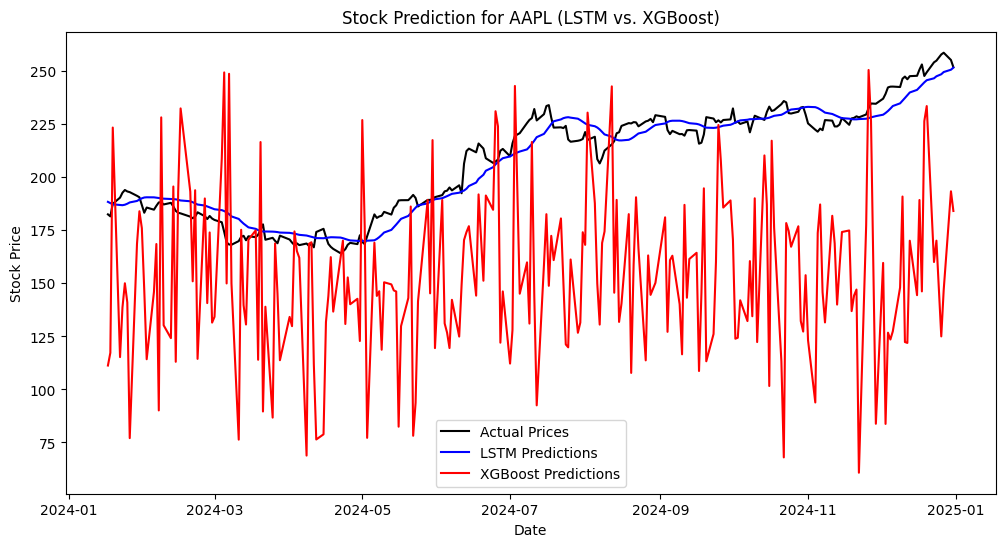

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost as xgb
from sklearn.model_selection import train_test_split


ticker = input("Enter Stock Ticker (e.g., AAPL, TSLA): ")


df = yf.download(ticker, start="2020-01-01", end="2025-01-01")
df = df[['Close']]


scaler_lstm = MinMaxScaler(feature_range=(0, 1))
df_scaled_lstm = scaler_lstm.fit_transform(df)

scaler_xgb = StandardScaler()
df_scaled_xgb = scaler_xgb.fit_transform(df)


def prepare_lstm_data(data, time_step=50):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

X_lstm, y_lstm = prepare_lstm_data(df_scaled_lstm)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)


def prepare_xgb_data(data, time_step=50):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

X_xgb, y_xgb = prepare_xgb_data(df_scaled_xgb)


split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)


lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=2, batch_size=16, verbose=1)


lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = scaler_lstm.inverse_transform(lstm_predictions.reshape(-1, 1))


xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_xgb, y_train_xgb)


xgb_predictions = xgb_model.predict(X_test_xgb)
xgb_predictions = scaler_xgb.inverse_transform(xgb_predictions.reshape(-1, 1))


plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_lstm):], scaler_lstm.inverse_transform(y_test_lstm.reshape(-1, 1)), label="Actual Prices", color='black')
plt.plot(df.index[-len(lstm_predictions):], lstm_predictions, label="LSTM Predictions", color='blue')
plt.plot(df.index[-len(xgb_predictions):], xgb_predictions, label="XGBoost Predictions", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.title(f"Stock Prediction for {ticker} (LSTM vs. XGBoost)")
plt.show()
